## Version 3 of testing

## Step 1: data preperation
The dataset is read and molecular desciptors are calculated. All discrete features are binarized. 

In [1]:
#import needed libraries
import pandas as pd
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score
from sklearn.utils import resample
from main_v1 import create_dataframe, check_normality


In [2]:
#import data
data_raw = pd.read_csv('../data/tested_molecules.csv')
data_raw

,SMILES,PKM2_inhibition,ERK2_inhibition
0,C=C(C)c1nc(N)nc(N)n1,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0
...,...,...,...
1111,O=C1c2ccccc2[C@H](Nc2ccc3c(c2)OCCO3)N1Cc1ccco1,0,1
1112,O=S(=O)(Nc1cccc(-c2cn3ccsc3[nH+]2)c1)c1ccc(F)cc1,0,1
1113,Oc1c(C[NH+]2CCN(c3ccccn3)CC2)cc(Cl)c2cccnc12,0,1
1114,c1ccc(-c2csc(N3CCN(c4ccccn4)CC3)n2)cc1,0,1


In [3]:
# Create dataframe
df_all_info = create_dataframe(data_raw)
df_all_info = df_all_info.iloc[:,:-1024] #remove fingerprints

df_all_info.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# delete PKM2_inhibition and ERK2_inhibition, as these are not features 
df_features = df_all_info.drop(columns = ['PKM2_inhibition','ERK2_inhibition'])
df_features.head()

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0


In [5]:
binarizing_variables = True

if binarizing_variables == True:
    #check if column has descrete values
    def is_discrete(col):
        # check if column is numeric
        if pd.api.types.is_numeric_dtype(col):
            # check for all non NaN-values if they are an integer
            return all(col.dropna().apply(lambda x: float(x).is_integer()))
        return False

    # binarize column
    def binarize_column(col):
        return col.apply(lambda x: 1 if x != 0 else 0)

    df_features_binarized = df_features.copy()
    # check if binirazing is needed, and if so --> do that
    for column in df_features.columns:
        if is_discrete(df_features_binarized[column]):
            df_features_binarized[f'{column}_binary'] = binarize_column(df_features_binarized[column])

else:
    df_features_binarized = df_features.copy()

df_features_binarized.head()


C:\Users\Ema\AppData\Local\Temp\ipykernel_30736\11575751.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_binarized[f'{column}_binary'] = binarize_column(df_features_binarized[column])
C:\Users\Ema\AppData\Local\Temp\ipykernel_30736\11575751.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_features_binarized[f'{column}_binary'] = binarize_column(df_features_binarized[column])
C:\Users\Ema\AppData\Local\Temp\ipykernel_30736\11575751.py:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually

,SMILES,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,...,fr_sulfide_binary,fr_sulfonamd_binary,fr_sulfone_binary,fr_term_acetylene_binary,fr_tetrazole_binary,fr_thiazole_binary,fr_thiocyan_binary,fr_thiophene_binary,fr_unbrch_alkane_binary,fr_urea_binary
0,C=C(C)c1nc(N)nc(N)n1,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,142.101,151.085795,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,239.593,250.039672,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,192.133,210.136828,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,220.143,232.084792,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,215.575,226.050905,...,0,0,0,0,0,0,0,0,0,0


## Step 2: Exploratory data analysis
A check is done to see if there is data missing. Columns that do not provide extra information (only the same value in the whole column) are removed. The summary statistics are provided. The data is checked for normal distribution. 

Moreover, descriptor selection is done based on PCA. 80% variance is captured with the pricinpal components that are used. For each principal component, the 4 features with the highest absolute loading are selected. 

In [6]:
# check if there are values missing in columns
nan_counts = df_features_binarized.columns[df_features_binarized.isnull().any()].tolist()
print('The amount of columns where values are missing values is:', len(nan_counts))

The amount of columns where values are missing values is: 0


In [7]:
# check if there are columns with only the same value
non_variating_columns = df_features_binarized.columns[df_features_binarized.nunique()==1].tolist()
print('The columns that only have the same value in them are:', non_variating_columns)

# remove the columns with only the same value, because molecules cannot be differentiated on those columns
if len(non_variating_columns) != 0:
    df_features_binarized.drop(columns = non_variating_columns, inplace = True)
    df_features_binarized.describe()

The columns that only have the same value in them are: ['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11', 'fr_HOCCN', 'fr_SH', 'fr_aldehyde', 'fr_azide', 'fr_azo', 'fr_benzodiazepine', 'fr_diazo', 'fr_epoxide', 'fr_hdrzine', 'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd', 'fr_term_acetylene', 'fr_thiocyan', 'NumValenceElectrons_binary', 'NumRadicalElectrons_binary', 'SMR_VSA8_binary', 'SlogP_VSA9_binary', 'EState_VSA11_binary', 'HeavyAtomCount_binary', 'NOCount_binary', 'NumHeteroatoms_binary', 'fr_HOCCN_binary', 'fr_SH_binary', 'fr_aldehyde_binary', 'fr_azide_binary', 'fr_azo_binary', 'fr_benzodiazepine_binary', 'fr_diazo_binary', 'fr_epoxide_binary', 'fr_hdrzine_binary', 'fr_hdrzone_binary', 'fr_isocyan_binary', 'fr_isothiocyan_binary', 'fr_nitro_arom_nonortho_binary', 'fr_nitroso_binary', 'fr_phos_acid_binary', 'fr_phos_ester_binary', 'fr_prisulfonamd_binary', 'fr_term_acetylene_

In [8]:
# look at the summary statistics
df_features_binarized.describe()

,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine_binary,fr_quatN_binary,fr_sulfide_binary,fr_sulfonamd_binary,fr_sulfone_binary,fr_tetrazole_binary,fr_thiazole_binary,fr_thiophene_binary,fr_unbrch_alkane_binary,fr_urea_binary
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,11.755641,11.755641,0.163540,-1.049675,0.684839,15.241012,347.818473,328.200409,347.458997,127.992832,...,0.156810,0.156810,0.177419,0.150538,0.020609,0.039427,0.046595,0.074373,0.069892,0.051075
std,2.232314,2.232314,0.183773,1.534098,0.148925,5.621078,71.906315,68.148378,71.829989,26.927705,...,0.363785,0.363785,0.382194,0.357758,0.142136,0.194695,0.210864,0.262494,0.255080,0.220250
min,3.295899,3.295899,0.000269,-6.846394,0.243857,9.066667,151.173000,142.101000,151.085795,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.862167,11.862167,0.046637,-1.242713,0.581350,11.113324,295.335500,278.281750,295.047004,108.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.412161,12.412161,0.105302,-0.404874,0.700589,14.273504,348.316500,328.242000,347.625500,128.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,12.892687,12.892687,0.205572,-0.123116,0.803140,17.368908,401.547500,378.322250,401.220656,146.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.950036,14.950036,1.101853,1.101853,0.945352,72.187500,592.649000,556.361000,592.253314,228.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# check if the values are normally destributed per column
normality_results = check_normality(df_features_binarized.iloc[:,1:]) # test all columns, except 'SMILES'

# print which columns are normally distributed
for column, p_value in normality_results.items():
    if p_value > 0.05:
        print(f"Column {column} is normally distributed (p-value = {p_value:.5f})")
print('Done with printing columns that are normally distributed')

Done with printing columns that are normally distributed


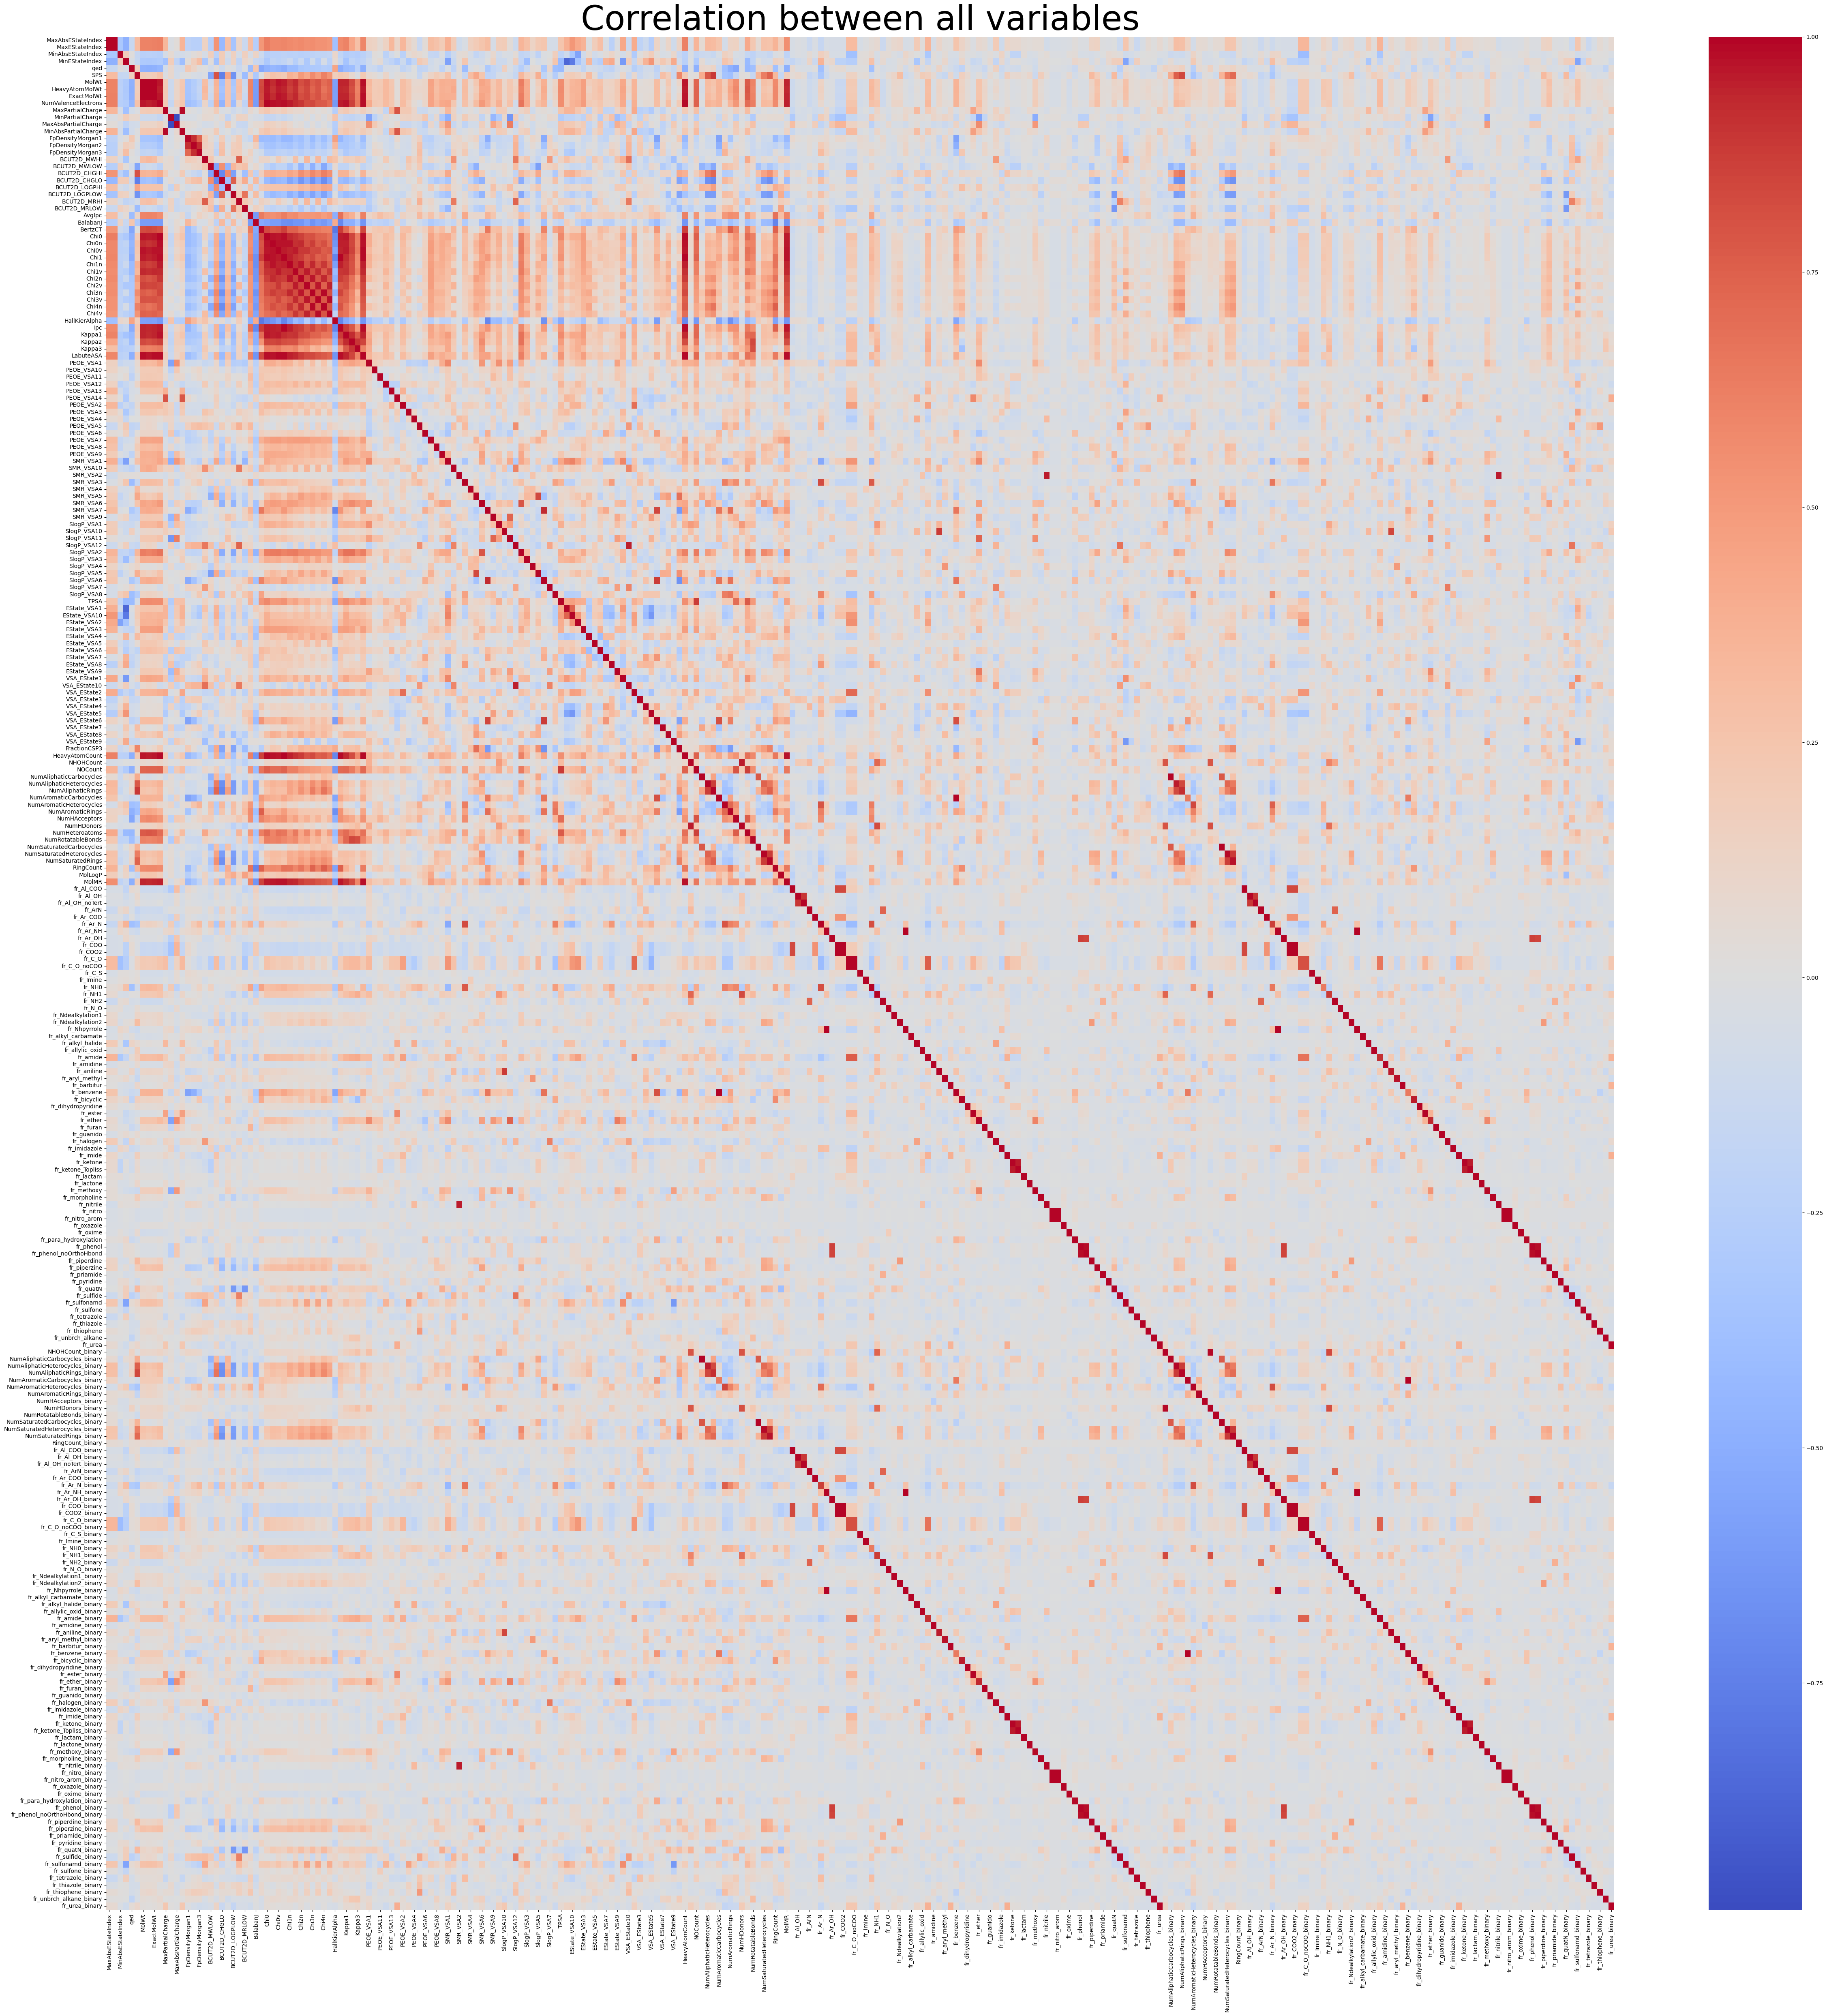

In [10]:
# make a correlation matrix to see the correlation between the descriptors
# Spearman test is used because there are no features with normal distribution
correlation_matrix = df_features_binarized.iloc[:,1:].corr(method = 'spearman')

# make a heatmap to visualize the correlation matrix
plt.figure(figsize=(60, 60))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation between all variables', fontdict={'fontsize' : 60});

In [11]:
# given that there are no columns with normal distribution, min-max scaling is performed on the dataset
scaler = MinMaxScaler()
scaled_array = scaler.fit_transform(df_features_binarized.iloc[:,1:])
df_features_scaled = pd.DataFrame(scaled_array, columns=df_features_binarized.iloc[:,1:].columns)

# show summary statistics of scaled features
df_features_scaled.describe()


,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_pyridine_binary,fr_quatN_binary,fr_sulfide_binary,fr_sulfonamd_binary,fr_sulfone_binary,fr_tetrazole_binary,fr_thiazole_binary,fr_thiophene_binary,fr_unbrch_alkane_binary,fr_urea_binary
count,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,...,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000,1116.000000
mean,0.725900,0.725900,0.148215,0.729308,0.628632,0.097818,0.445427,0.449233,0.445122,0.431777,...,0.156810,0.156810,0.177419,0.150538,0.020609,0.039427,0.046595,0.074373,0.069892,0.051075
std,0.191547,0.191547,0.166826,0.193011,0.212297,0.089053,0.162877,0.164506,0.162818,0.152998,...,0.363785,0.363785,0.382194,0.357758,0.142136,0.194695,0.210864,0.262494,0.255080,0.220250
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.735041,0.735041,0.042092,0.705021,0.481105,0.032424,0.326547,0.328733,0.326319,0.318182,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.782234,0.782234,0.095347,0.810433,0.651084,0.082490,0.446555,0.449334,0.445499,0.431818,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.823466,0.823466,0.186371,0.845882,0.797273,0.131529,0.567130,0.570225,0.566984,0.534091,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# perform PCA
pca = PCA()
pca.fit(df_features_scaled)

PCA()

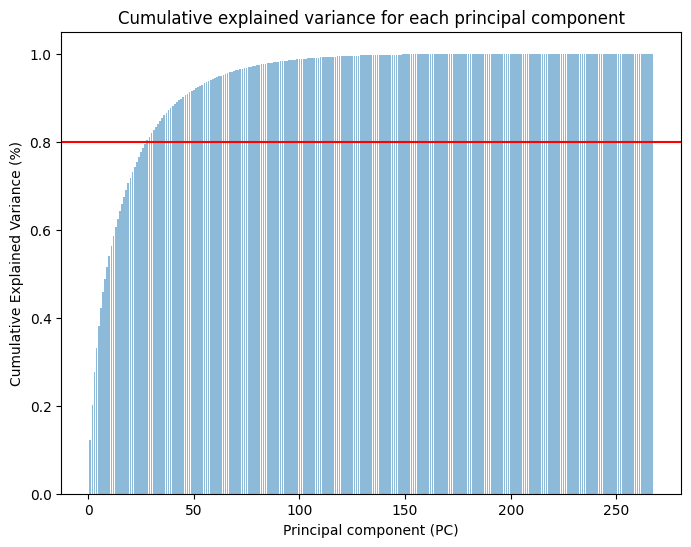

In [13]:
#calculate the cummulative explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

#visualize the cumulative explained variance in a graph
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cumulative_variance) + 1), cumulative_variance, alpha=0.5, align='center')

#make a threshold line based on the cumulative explained variance threshold that is chosen
cum_var_threshold = 0.8
plt.axhline(y=cum_var_threshold,color='r',linestyle='-')

plt.xlabel('Principal component (PC)')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative explained variance for each principal component');

In [14]:
# number of principal components that are chosen based on the threshold
num_components = np.argmax(cumulative_variance >= cum_var_threshold) + 1
print(f'The amount of principal components needed to capture at least {round(cum_var_threshold*100)}% variance is {num_components}.')

The amount of principal components needed to capture at least 80% variance is 28.


In [15]:
# Apply PCA with the desired number of components
pca = PCA(n_components=num_components)
pca_scores = pca.fit_transform(df_features_scaled)
df_pc_scores = pd.DataFrame(pca_scores, columns=[f'PC{i+1}' for i in range(num_components)])
df_pc_scores

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
0,-2.473361,-1.398158,0.104754,1.264418,0.018633,-0.258464,-0.367679,-0.876517,0.216068,-0.748058,...,-0.055382,0.593087,0.069073,-0.556820,-0.279671,-0.111393,-0.110632,-0.271725,0.252482,-0.373794
1,-1.816103,-1.319707,-0.445396,-0.587960,0.827512,0.180520,-0.228755,0.003464,0.480562,0.473528,...,-0.088216,-0.207553,0.297928,-0.417901,0.062565,-0.097765,-0.308466,0.078002,-0.204459,-0.132625
2,-0.675022,-1.731759,1.612628,0.467215,-0.647918,-0.674316,0.087325,0.011882,0.030782,-0.358741,...,-0.782591,-0.568345,-0.027064,-0.094701,-0.069125,0.268665,-0.682352,-0.315155,0.317151,-0.178013
3,-2.027671,-0.797188,-0.923560,-0.479304,0.395934,0.580169,0.371216,-0.114680,-0.086512,0.155710,...,0.229836,-0.127815,-0.211419,-0.166911,-0.340376,0.269814,0.002837,0.114455,0.014205,0.086043
4,-2.175839,-1.608680,-0.689338,-0.193993,-0.397309,-0.567009,-0.684665,-0.309767,-0.341918,0.272462,...,-0.366231,-0.310899,-0.149066,0.014690,-0.221721,0.379252,-0.095086,0.238795,0.178211,-0.353143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,0.573531,0.467459,0.553709,-0.156046,0.338391,0.567381,0.672113,-0.179189,0.168770,0.093012,...,-0.633368,0.615300,0.109519,0.221635,-0.285652,-0.208969,-0.263950,-0.463947,0.074744,-0.044723
1112,-1.448240,1.001661,-0.130277,0.860781,0.093196,0.564804,-1.023293,1.190794,0.269712,1.383636,...,-0.195757,0.290985,0.646870,0.023904,-0.242773,-0.040480,0.198547,0.020932,0.019664,0.549073
1113,0.290002,0.295719,-1.330446,1.684364,0.512890,0.497489,-0.317178,-0.470084,-0.651502,-0.045728,...,0.209464,-0.705572,-0.007092,0.152707,0.970735,-0.322054,0.234268,-0.166074,0.387626,1.152210
1114,-0.427006,-0.467892,-2.200059,0.224780,0.103901,0.833752,-0.823548,-0.660760,-0.421436,-0.675584,...,-0.436106,-0.275891,0.239496,0.303678,0.394008,-0.826953,-0.046022,-0.016229,-0.148482,0.062341


## Step 3: test different machine learning models
Logistic regression, decision tree and random forest are tested. They are tested on the inhibitors seperately.

In [16]:
df_pc_scores_labels = df_pc_scores.copy()
df_pc_scores_labels['PKM2_inhibition'] = data_raw.iloc[:, 1]
df_pc_scores_labels['ERK2_inhibition'] = data_raw.iloc[:, 2]
df_pc_scores_labels.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PKM2_inhibition,ERK2_inhibition
0,-2.473361,-1.398158,0.104754,1.264418,0.018633,-0.258464,-0.367679,-0.876517,0.216068,-0.748058,...,0.069073,-0.556820,-0.279671,-0.111393,-0.110632,-0.271725,0.252482,-0.373794,0,0
1,-1.816103,-1.319707,-0.445396,-0.587960,0.827512,0.180520,-0.228755,0.003464,0.480562,0.473528,...,0.297928,-0.417901,0.062565,-0.097765,-0.308466,0.078002,-0.204459,-0.132625,0,0
2,-0.675022,-1.731759,1.612628,0.467215,-0.647918,-0.674316,0.087325,0.011882,0.030782,-0.358741,...,-0.027064,-0.094701,-0.069125,0.268665,-0.682352,-0.315155,0.317151,-0.178013,0,0
3,-2.027671,-0.797188,-0.923560,-0.479304,0.395934,0.580169,0.371216,-0.114680,-0.086512,0.155710,...,-0.211419,-0.166911,-0.340376,0.269814,0.002837,0.114455,0.014205,0.086043,0,0
4,-2.175839,-1.608680,-0.689338,-0.193993,-0.397309,-0.567009,-0.684665,-0.309767,-0.341918,0.272462,...,-0.149066,0.014690,-0.221721,0.379252,-0.095086,0.238795,0.178211,-0.353143,0,0


In [17]:
def split_data(data, label, resample_method):
    #options for 'resample': 'undersample', 'oversample' and 'no_resampling' 

    #resample based on what type of resampling is preffered
    if resample_method == 'undersample' or resample_method == 'oversample':
        big_group = data[data[label] == 0] # no inhibitor
        small_group = data[data[label] == 1] # yes inhibitor

        if resample_method == 'undersample':
            # Undersample the big group to match the size of the small group
            big_group_same_size = resample(big_group, replace=False, n_samples=len(small_group), random_state=None)
            data_resampled = pd.concat([big_group_same_size, small_group])
        elif resample_method == 'oversample':
            # Oversample the small group to match the size of the big group
            small_group_oversampled = resample(small_group, replace=True, n_samples=len(big_group), random_state=None)
            data_resampled = pd.concat([big_group, small_group_oversampled])

    if resample_method == 'no_resampling':
        data_resampled = data.copy()
        
    # seperate features and label
    X_set = data_resampled.iloc[:, :-2].values # features
    if label == 'PKM2_inhibition':
        y_set = data_resampled.iloc[:, -2].values
    if label == 'ERK2_inhibition':
        y_set = data_resampled.iloc[:, -1].values

    # data split in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X_set, y_set, test_size=0.2, random_state=None)  
             
    return X_train, X_test, y_train, y_test


# type_of_resampling = 'oversample'
# X_PKM2_train, X_PKM2_test, y_PKM2_train, y_PKM2_test = split_data(df_pc_scores_labels, 'PKM2_inhibition', resample_method=type_of_resampling)
# X_ERK2_train, X_ERK2_test, y_ERK2_train, y_ERK2_test = split_data(df_pc_scores_labels, 'ERK2_inhibition', resample_method=type_of_resampling)

In [18]:
def classifier(X_train, X_test, y_train, classifier_type):
    #choose for classifier type: DT (=decision tree), RF (=random forest), LR (= logisitic regression) or SVM (=support vector machine) 

    #logistic regression
    if classifier_type == 'LR':
        log_reg = LogisticRegression(random_state=None) # initiate logistic regression
        log_reg.fit(X_train, y_train) # fit logistic regrssion

        y_prob = log_reg.predict_proba(X_test)[:, 1] # predict chance for outcome
        threshold = 0.25 # change this variable to different chance thresholds
        y_pred = (y_prob >= threshold).astype(int) # choose value based on threshold
    
    #decision tree
    if classifier_type == 'DT':
        dt = DecisionTreeClassifier(random_state=None) # initiate decision tree
        dt.fit(X_train, y_train) # fit decision tree
        y_pred = dt.predict(X_test) # make prediction
    
    #random forest
    if classifier_type == 'RF':
        num_estimators = 100 # change this variable to test different number of estimators
        rf = RandomForestClassifier(n_estimators=num_estimators, random_state=None) # initiate Random Forest
        rf.fit(X_train, y_train) # fit random forest
        y_pred = rf.predict(X_test) # make predictions

    #support vector machine
    if classifier_type == 'SVM':
        svm = SVC(kernel='poly')  # you can also try other kernels such as 'rbf', 'poly', etc 
        svm.fit(X_train, y_train) # fit support vector machine
        y_pred = svm.predict(X_test)

    return y_pred


In [19]:
# code for checking how good prediction is
def goodness_prediction(y_test, y_pred):
    conf_matrix = confusion_matrix(y_test, y_pred) #confusion matrix
    accuracy = accuracy_score(y_test, y_pred) #accuracy
    precision = precision_score(y_test, y_pred) #precision
    sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0]) #sensitivity (true positive rate)
    specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) #specificity (true negative rate)

    return conf_matrix, accuracy, precision, sensitivity, specificity


In [20]:
def average_results(data, label, classifier_type, resample_method, iterations=10):
    accuracies, precisions, sensitivities, specificities = [], [], [], []

    for i in range(iterations):
        X_train, X_test, y_train, y_test = split_data(data, label, resample_method)
        y_pred = classifier(X_train, X_test, y_train, classifier_type)
        conf_matrix, accuracy, precision, sensitivity, specificity = goodness_prediction(y_test, y_pred)

        accuracies.append(accuracy)
        precisions.append(precision)
        sensitivities.append(sensitivity)
        specificities.append(specificity)

    avg_accuracy = sum(accuracies) / iterations
    avg_precision = sum(precisions) / iterations
    avg_sensitivity = sum(sensitivities) / iterations
    avg_specificity = sum(specificities) / iterations

    print(f'\nAVERAGED RESULTS FOR {classifier_type} MODEL {label}:')
    print('The average accuracy is:', round(avg_accuracy, 2))
    print('The average precision is:', round(avg_precision, 2))
    print('The average sensitivity is:', round(avg_sensitivity, 2))
    print('The average specificity is:', round(avg_specificity, 2))
    print('The last predicition in the itteration had confusion matrix:\n', conf_matrix)

# Test and evaluate all models for both inhibitors
sampling_method = 'no_resampling' # 'oversample', 'undersample' and 'no_resampling' possible

# FIRST TEST PKM2 INHIBITOR
for clf_type in ['DT', 'LR', 'RF', 'SVM']:
    average_results(df_pc_scores_labels, 'PKM2_inhibition', clf_type, resample_method=sampling_method, iterations=10)

# NOW TEST ERK2 INHIBITOR
for clf_type in ['DT', 'LR', 'RF', 'SVM']:
    average_results(df_pc_scores_labels, 'ERK2_inhibition', clf_type, resample_method=sampling_method, iterations=10)


AVERAGED RESULTS FOR DT MODEL PKM2_inhibition:
The average accuracy is: 0.94
The average precision is: 0.05
The average sensitivity is: 0.08
The average specificity is: 0.96
The last predicition in the itteration had confusion matrix:
 [[206  10]
 [  7   1]]

AVERAGED RESULTS FOR LR MODEL PKM2_inhibition:
The average accuracy is: 0.97
The average precision is: 0.19
The average sensitivity is: 0.1
The average specificity is: 0.99
The last predicition in the itteration had confusion matrix:
 [[219   1]
 [  4   0]]


c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_


AVERAGED RESULTS FOR RF MODEL PKM2_inhibition:
The average accuracy is: 0.97
The average precision is: 0.0
The average sensitivity is: 0.0
The average specificity is: 1.0
The last predicition in the itteration had confusion matrix:
 [[217   0]
 [  7   0]]

AVERAGED RESULTS FOR SVM MODEL PKM2_inhibition:
The average accuracy is: 0.97
The average precision is: 0.0
The average sensitivity is: 0.0
The average specificity is: 1.0
The last predicition in the itteration had confusion matrix:
 [[216   0]
 [  8   0]]

AVERAGED RESULTS FOR DT MODEL ERK2_inhibition:
The average accuracy is: 0.91
The average precision is: 0.08
The average sensitivity is: 0.09
The average specificity is: 0.94
The last predicition in the itteration had confusion matrix:
 [[203  10]
 [ 10   1]]

AVERAGED RESULTS FOR LR MODEL ERK2_inhibition:
The average accuracy is: 0.95
The average precision is: 0.04
The average sensitivity is: 0.02
The average specificity is: 0.99
The last predicition in the itteration had confusi

c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_


AVERAGED RESULTS FOR RF MODEL ERK2_inhibition:
The average accuracy is: 0.95
The average precision is: 0.0
The average sensitivity is: 0.0
The average specificity is: 1.0
The last predicition in the itteration had confusion matrix:
 [[214   0]
 [ 10   0]]

AVERAGED RESULTS FOR SVM MODEL ERK2_inhibition:
The average accuracy is: 0.95
The average precision is: 0.0
The average sensitivity is: 0.0
The average specificity is: 1.0
The last predicition in the itteration had confusion matrix:
 [[211   0]
 [ 13   0]]


c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Ema\TUe BMT bachelor\jaar 2\Advanced programming\Assignment4\GroupAssignment\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_